Mauricio Cantú Torres A01633805

# K-means clustering

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [88]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [89]:
# url string that hosts our .csv file
# Dataset url
url = "datasets/cartwheel/cartwheel.csv"

# Load the dataset
dataset = pd.read_csv(url)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [90]:
dataset.shape

(28, 12)

2. Drop rows with any missing values

In [91]:
dataset = dataset.dropna()
dataset.shape

(25, 12)

3. Encoding the class label categorical column: from string to num


In [92]:
# Encoding the categorical column

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

4. Discard columns that won't be used


In [93]:
dataset.drop(["ID","Age","Gender","Glasses","GlassesGroup","Height","Complete","CompleteGroup","Score"], axis = "columns", inplace = True)

In [94]:
dataset.head(5)

,GenderGroup,Wingspan,CWDistance
0,1,61.0,79
1,1,60.0,70
2,1,64.0,85
3,1,63.0,87
4,2,75.0,72


5. Scatter plot of the data

<function matplotlib.pyplot.show(close=None, block=None)>

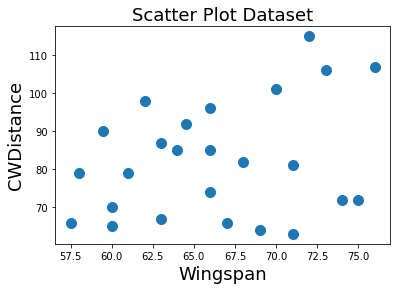

In [95]:
plt.scatter(dataset.Wingspan, dataset.CWDistance, s=100)
plt.title("Scatter Plot Dataset", fontsize=18)
plt.xlabel("Wingspan", fontsize=18)
plt.ylabel("CWDistance", fontsize=18)

plt.show

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

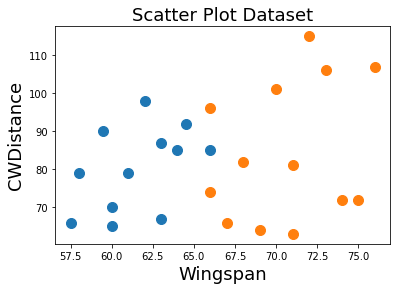

In [96]:
df1 = dataset[dataset.GenderGroup==1]
df2 = dataset[dataset.GenderGroup==2]

plt.scatter(df1.Wingspan, df1.CWDistance, s=100)
plt.scatter(df2.Wingspan, df2.CWDistance, s=100)

plt.title("Scatter Plot Dataset", fontsize=18)
plt.xlabel("Wingspan", fontsize=18)
plt.ylabel("CWDistance", fontsize=18)

plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [104]:
from sklearn.cluster import KMeans

K = 2

#Crear objeto para hacer kmeans y definir el numero de clusters
km = KMeans(n_clusters = K)

#Do kmeans
clusters = km.fit_predict(dataset[["Wingspan", "CWDistance"]])

clusters

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [105]:
dataset["cluster1"] = clusters

dataset

,GenderGroup,Wingspan,CWDistance,cluster1
0,1,61.0,79,0
1,1,60.0,70,0
2,1,64.0,85,0
3,1,63.0,87,0
4,2,75.0,72,0
5,2,71.0,81,0
6,2,76.0,107,1
7,1,62.0,98,1
8,2,73.0,106,1
9,1,60.0,65,0


In [106]:
km.cluster_centers_

array([[ 65.5       ,  73.94117647],
       [ 67.875     , 100.625     ]])

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

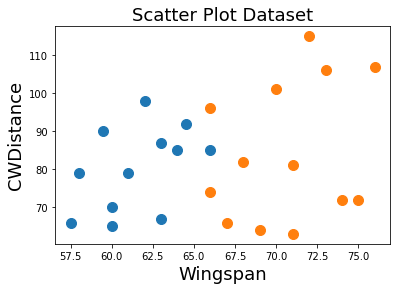

In [108]:
df1 = dataset[dataset.GenderGroup==1]
df2 = dataset[dataset.GenderGroup==2]

plt.scatter(df1.Wingspan, df1.CWDistance, s=100)
plt.scatter(df2.Wingspan, df2.CWDistance, s=100)

plt.title("Scatter Plot Dataset", fontsize=18)
plt.xlabel("Wingspan", fontsize=18)
plt.ylabel("CWDistance", fontsize=18)

plt.show()

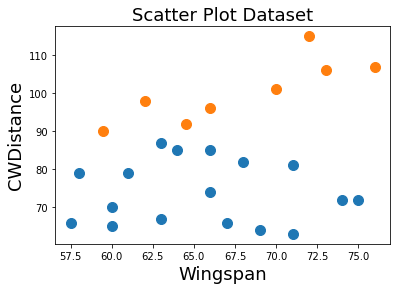

In [109]:
df1 = dataset[dataset.cluster1==0]
df2 = dataset[dataset.cluster1==1]

plt.scatter(df1.Wingspan, df1.CWDistance, s=100)
plt.scatter(df2.Wingspan, df2.CWDistance, s=100)

plt.title("Scatter Plot Dataset", fontsize=18)
plt.xlabel("Wingspan", fontsize=18)
plt.ylabel("CWDistance", fontsize=18)

plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [102]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[["Wingspan", "CWDistance"]])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


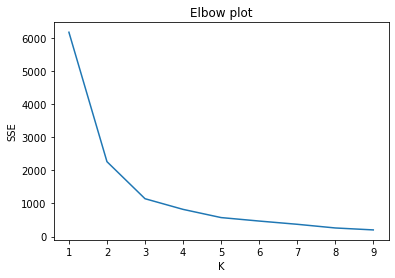

In [103]:
plt.plot(k_rng,sse)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot


5. Draw conclusiones:
    - About the scalling: does it helps or not? 
    
    Depende del caso, ajustar la escala de ciertos datos puede ayudar a apreciarlos de una forma más clara, sin embargo, en el contexto de la actividad, en la cual se trabaja con el dataset de iris, no ayuda mucho, ya que no altera el clustering.
    
    - About the elbow plot: does the K agree with the real number of clusters?
    
    Si, sabemos que el dataset de iris tiene 3 clusters por cada clase de iris, y el elbow plot muestra que 3 es el número indicado de clusters.
    
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
    
    Primeramente, tomando en cuenta que no podemos realizar scatters cuando se incluyen todas las columnas del dataset de iris, diría que este caso es el peor. Los otros dos muestran de forma gráfica y fácil de entender el como se comportan los datos de la planta y a que clase de planta pertenecen. Es por esto que afirmaría que el caso 1 y 2 son los mejores.
    

In [90]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

In [92]:
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [93]:
dataset.drop(['SepalLength', 'SepalWidth'],axis='columns',inplace=True)

dataset


,PetalLength,PetalWidth,Class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [94]:
km = KMeans(n_clusters=2)

yp = km.fit_predict(dataset[['PetalLength','PetalWidth']])

yp


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,PetalLength,PetalWidth,Class,Cluster1
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [96]:
dataset.Cluster1.unique()

array([1, 0])

In [97]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

<ipython-input-98-be7daafd43bc>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Flower Group 1')
<ipython-input-98-be7daafd43bc>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Flower Group 2')


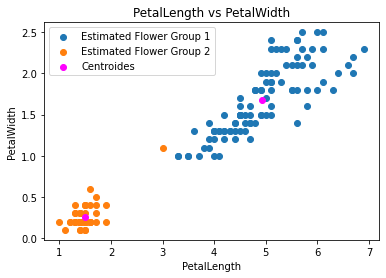

In [98]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]

plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Flower Group 1')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Flower Group 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='o', label='Centroides')

plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['PetalLength']])
dataset['PetalLength'] = scaler.transform(dataset[['PetalLength']])

scaler.fit(dataset[['PetalWidth']])
dataset['PetalWidth'] = scaler.transform(dataset[['PetalWidth']])

dataset

,PetalLength,PetalWidth,Class,Cluster1
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


In [100]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[["PetalLength", "PetalWidth"]])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


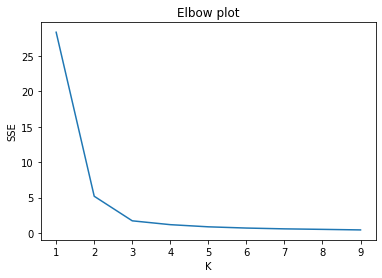

In [101]:
plt.plot(k_rng,sse)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [102]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

In [103]:
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
dataset.drop(['PetalLength', 'PetalWidth'],axis='columns',inplace=True)

dataset

,SepalLength,SepalWidth,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [105]:
km = KMeans(n_clusters=2)

yp = km.fit_predict(dataset[['SepalLength','SepalWidth']])

yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [106]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,SepalLength,SepalWidth,Class,Cluster1
0,5.1,3.5,0,0
1,4.9,3.0,0,0
2,4.7,3.2,0,0
3,4.6,3.1,0,0
4,5.0,3.6,0,0
...,...,...,...,...
145,6.7,3.0,2,1
146,6.3,2.5,2,1
147,6.5,3.0,2,1
148,6.2,3.4,2,1


In [107]:
km.cluster_centers_

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

<ipython-input-108-b9ea75522496>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Estimated Flower Group 1')
<ipython-input-108-b9ea75522496>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Estimated Flower Group 2')


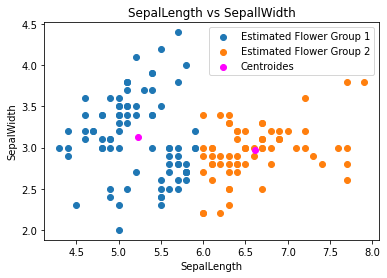

In [108]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]

plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Estimated Flower Group 1')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Estimated Flower Group 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='o', label='Centroides')

plt.title('SepalLength vs SepallWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['SepalLength']])
dataset['SepalLength'] = scaler.transform(dataset[['SepalLength']])

scaler.fit(dataset[['SepalWidth']])
dataset['SepalWidth'] = scaler.transform(dataset[['SepalWidth']])

dataset

,SepalLength,SepalWidth,Class,Cluster1
0,0.222222,0.625000,0,0
1,0.166667,0.416667,0,0
2,0.111111,0.500000,0,0
3,0.083333,0.458333,0,0
4,0.194444,0.666667,0,0
...,...,...,...,...
145,0.666667,0.416667,2,1
146,0.555556,0.208333,2,1
147,0.611111,0.416667,2,1
148,0.527778,0.583333,2,1


In [110]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[["SepalLength", "SepalWidth"]])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


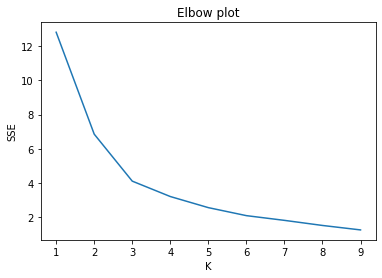

In [111]:
plt.plot(k_rng,sse)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [112]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

In [113]:
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [114]:
km = KMeans(n_clusters=2)

yp = km.fit_predict(dataset[['SepalLength','SepalWidth','PetalLength','PetalWidth']])

yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Cluster1
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [116]:
km.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['SepalLength']])
dataset['SepalLength'] = scaler.transform(dataset[['SepalLength']])

scaler.fit(dataset[['SepalWidth']])
dataset['SepalWidth'] = scaler.transform(dataset[['SepalWidth']])

scaler.fit(dataset[['PetalLength']])
dataset['PetalLength'] = scaler.transform(dataset[['PetalLength']])

scaler.fit(dataset[['PetalWidth']])
dataset['PetalWidth'] = scaler.transform(dataset[['PetalWidth']])

dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Cluster1
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,1
146,0.555556,0.208333,0.677966,0.750000,2,1
147,0.611111,0.416667,0.711864,0.791667,2,1
148,0.527778,0.583333,0.745763,0.916667,2,1


In [118]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[["PetalLength","PetalWidth","SepalLength", "SepalWidth"]])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


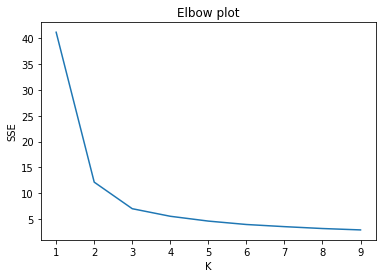

In [119]:
plt.plot(k_rng,sse)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()